In [2]:
# Part 1 - import basic package and dataset

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Dataset/spam.tsv' , sep = '\t')

In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [8]:
# No missing data

In [9]:
df['label'].value_counts() / len(df) *100

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

In [10]:
# data is imbalance , we have to balance it prior building model

ham = df[df['label'] == 'ham']
spam  = df[df['label'] == 'spam']

In [12]:
print(ham.shape)
print(spam.shape)

(4825, 4)
(747, 4)


In [14]:
spam = spam.sample(ham.shape[0] , replace = True)

In [23]:
spam

,label,message,length,punct
2959,spam,U have a secret admirer. REVEAL who thinks U R...,147,6
1217,spam,You have 1 new voicemail. Please call 08719181...,50,2
3560,spam,URGENT! We are trying to contact U Todays draw...,156,4
5365,spam,Camera - You are awarded a SiPix Digital Camer...,106,4
3807,spam,URGENT! We are trying to contact you. Last wee...,158,5
...,...,...,...,...
1635,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ...",161,9
2064,spam,"URGENT! Your mobile No *********** WON a £2,00...",158,19
3750,spam,Dear Voucher Holder 2 claim your 1st class air...,147,1
164,spam,-PLS STOP bootydelious (32/F) is inviting you ...,152,13


In [27]:
data = pd.merge(ham , spam , how = 'outer')

In [28]:
data

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,ham,U dun say so early hor... U c already then say...,49,6
3,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
4,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
9645,spam,Monthly password for wap. mobsi.com is 391784....,73,4
9646,spam,Monthly password for wap. mobsi.com is 391784....,73,4
9647,spam,Monthly password for wap. mobsi.com is 391784....,73,4
9648,spam,Monthly password for wap. mobsi.com is 391784....,73,4


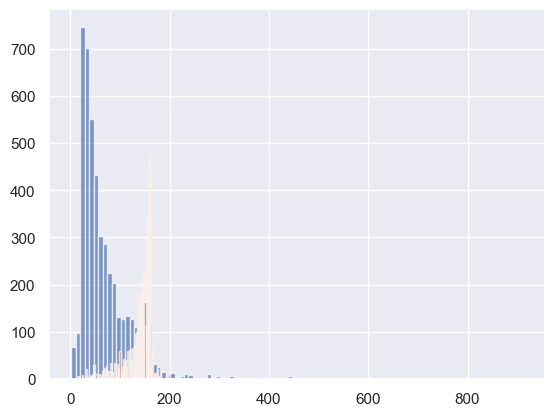

In [29]:
# Visualization by using ham and spam dataset
plt.hist(data[data['label'] == 'ham']['length'] , bins = 100 , alpha = 0.7 )
plt.hist(data[data['label'] == 'spam']['length'] , bins = 100 , alpha = 0.7 )
plt.show()

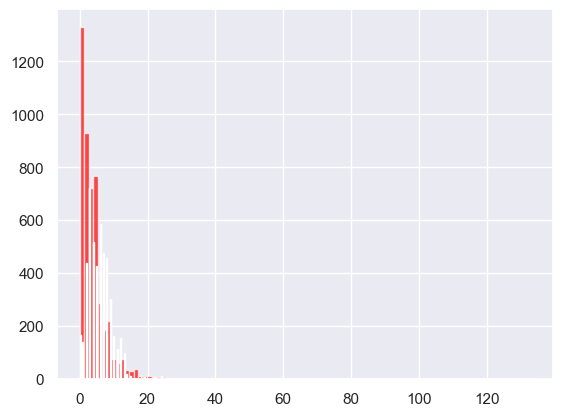

In [32]:
plt.hist(data[data['label'] == 'ham']['punct'] , bins = 100 , alpha = 0.7 , color = 'red')
plt.hist(data[data['label'] == 'spam']['punct'] , bins = 100 , alpha = 1 , color = 'black')
plt.show()

In [36]:
data['message'][0] ->convert every text into number

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [37]:
# We have to convert message into bag of word(BOW) format -> text to vector
# ML works with numbers only

import re # Regular expression wherever $ ,@ , ' ,"->symbol given we are removing it . wherever The,the->both are same is given in differnet caps and small case so we can merge into one
import nltk #natural language tool kit
from nltk.corpus import stopwords # total length 9650 words get applied. stopwords ->whenever we make sentance we use is am are was were can could may might must i you your yourself . i am removing the helping vorb and remove the prepostion , preposition , articles . what ever the real words there adjectives, adverb , main verbs i wanted to take them and analyse them. what we are doing is reducing the lenght.
from nltk.stem import WordNetLemmatizer # sometime go,goes,gone, going ->all are same form root word is go. python is a case sensitive language all the words are considered as a different freatures so lots of features gets created so we are saying reducing the feature to go

In [43]:
# bag of words - data['message'] convert text to vector
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

x = cv.fit_transform(data['message']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
pd.DataFrame(x).shape

(9650, 8710)

In [46]:
# splot the data into train and test for building a model for prediction
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , data['label'] , test_size = 0.25 , random_state = 1 ,  stratify= data['label'])

In [62]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
y_train

9173    spam
8193    spam
7212    spam
6694    spam
8599    spam
        ... 
6286    spam
353      ham
6806    spam
7161    spam
5721    spam
Name: label, Length: 7237, dtype: object

In [47]:
# Building a naive bayes theorem
# Gaussian NB
# Bernouli NB

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [48]:
#Gaussion
gnb = GaussianNB()
gnb.fit(x_train , y_train)

GaussianNB()

In [49]:
y_pred_gnb_train = gnb.predict(x_train)
y_pred_gnb_test = gnb.predict(x_test)

In [50]:
# Evaluation matrix
from sklearn.metrics import confusion_matrix ,classification_report , accuracy_score

In [51]:
print(confusion_matrix(y_train , y_pred_gnb_train))
print(confusion_matrix(y_test , y_pred_gnb_test))

[[3388  231]
 [   0 3618]]
[[1061  145]
 [   0 1207]]


In [52]:
print(classification_report(y_train , y_pred_gnb_train))
print(classification_report(y_test , y_pred_gnb_test))

              precision    recall  f1-score   support

         ham       1.00      0.94      0.97      3619
        spam       0.94      1.00      0.97      3618

    accuracy                           0.97      7237
   macro avg       0.97      0.97      0.97      7237
weighted avg       0.97      0.97      0.97      7237

              precision    recall  f1-score   support

         ham       1.00      0.88      0.94      1206
        spam       0.89      1.00      0.94      1207

    accuracy                           0.94      2413
   macro avg       0.95      0.94      0.94      2413
weighted avg       0.95      0.94      0.94      2413



In [53]:
print(accuracy_score(y_train , y_pred_gnb_train))
print(accuracy_score(y_test , y_pred_gnb_test))

0.968080696421169
0.9399088271860754


In [55]:
bnb = BernoulliNB()
bnb.fit(x_train , y_train)

BernoulliNB()

In [56]:
y_pred_bnb_train = bnb.predict(x_train)
y_pred_bnb_test = bnb.predict(x_test)

In [57]:
print(confusion_matrix(y_train , y_pred_bnb_train))
print(confusion_matrix(y_test , y_pred_bnb_test))

[[3616    3]
 [ 102 3516]]
[[1205    1]
 [  50 1157]]


In [58]:
print(classification_report(y_train , y_pred_bnb_train))
print(classification_report(y_test , y_pred_bnb_test))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      3619
        spam       1.00      0.97      0.99      3618

    accuracy                           0.99      7237
   macro avg       0.99      0.99      0.99      7237
weighted avg       0.99      0.99      0.99      7237

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1206
        spam       1.00      0.96      0.98      1207

    accuracy                           0.98      2413
   macro avg       0.98      0.98      0.98      2413
weighted avg       0.98      0.98      0.98      2413



In [59]:
print(accuracy_score(y_train , y_pred_bnb_train))
print(accuracy_score(y_test , y_pred_bnb_test))

0.9854912256459859
0.9788644840447576
